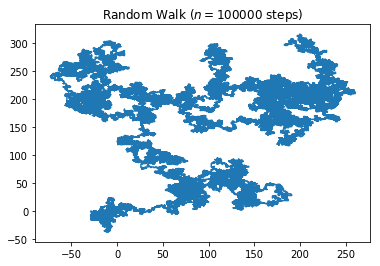

In [20]:
# Python code for 2D random walk. 
import numpy as np
import matplotlib.pyplot as plt
  
# defining the number of steps 
nsteps = 100000
  
# Make a function that does all of this for us    
def randomWalk(nsteps,debug=False):    
    
    #creating two array for containing x and y coordinate 
    #of size equals to the number of size and filled up with 0's 
    x = np.zeros(nsteps) 
    y = np.zeros(nsteps) 
    
    # filling the coordinates with random variables 
    for i in range(1, nsteps): 
        val = np.random.randint(1, 5) 
        if (debug): print("Random number = " + str(val))
        if val == 1: 
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
        elif val == 2: 
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
        elif val == 3: 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
        else: 
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1
    
    # Return the array of values
    return [x,y]
    
   
#debug=True    
walk = randomWalk(nsteps)
#print(walk)
plt.plot(walk[0],walk[1],label= 'Random walk')
plt.title("Random Walk ($n = " + str(nsteps) + "$ steps)") 
#plt.axis([-10,10,-10,10])
plt.show()
      